In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from sympy import Point, Polygon

# PRM

- First generate some valid points (Here 10, Line not intersecting polygon or point inside polygon) using uniform random distribution to and join nearest neighbours for each point.
- Then make another loop where it generates a valid point and then connects it to its nearest 3 neighbours with valid connections, if there is no connection possible, drop that point 

In [2]:
def PolygonIntersectPolygon(polygon_points : list, other_points : list) -> bool:
    """Check if 2 polygons (polygon, line, point) intersect each other

    Args:
        polygon_points (list): Vertices of polygon (obstacle). Here simply it is considering it to be a rectangle
        other_points (list): Vertices of a line or a point

    Returns:
        bool: Returns whether a line and a polygon intersects or in case of a point, returns whether point is inside the polygon or not
    """
    p1, p2, p3, p4 = map(Point, polygon_points)
    if len(other_points) > 1 : p5, p6 = map(Point, other_points) # If it is a line
    else : p5, p6 = Point(other_points[0]), None # Else it is a point
    poly1 = Polygon(p1, p2, p3, p4)
    poly2 = Polygon(p5, p6) if len(other_points) > 1 else Polygon(p5)
    isIntersection = poly1.intersection(poly2) if len(other_points) > 1 else poly1.encloses(poly2) # Check intersection or point inside
    if len(other_points) > 1 : 
        return False if len(isIntersection) == 0 else True # Returns False if point not inside polygon, else true
    else : return isIntersection # Returns true if line intersects polygon, else False

def _getDistance(point1 : list or tuple, point2 : list or tuple) -> float:
    """Returns Euclidean Distance between 2 points

    Args:
        point1 (listortuple): Point 1 (x, y)
        point2 (listortuple): Point 2 (x, y)

    Returns:
        float: Distance between Point 1 and Point 2
    """
    return np.sqrt( (point1[0] - point2[0]) ** 2 + (point1[1] - point2[1]) ** 2 )


In [3]:
MAX_POINTS = 10
skipped = False
connections = np.zeros((MAX_POINTS * 2 + 2, MAX_POINTS * 2 + 2), dtype = 'int64') # I am considering part 1 and part 2 make same amount of points
obstacle_edge_points = [(3, 3), (3, 7), (7, 7), (7, 3)] # Rectangule edge points
points = []

# Generate the Starting point/ Seed
while len(points) == 0:
    x, y = np.random.rand() * 10, np.random.rand() * 10
    if PolygonIntersectPolygon(obstacle_edge_points, [(x, y)]) : continue
    else : points.append((x, y))

# While ther are not 10 Points, generate a point, check if it is valid, Add a valid connection

while len(points) < MAX_POINTS:
    x, y = np.random.rand() * 10, np.random.rand() * 10
    if PolygonIntersectPolygon(obstacle_edge_points, [(x, y)]) or (x, y) in points: continue # If point inside polygon, skip that point
    distances = []
    for point in points:
        # Compute distances to each point, if line intersects polygon add a maximum value

        if PolygonIntersectPolygon(obstacle_edge_points, [(x, y), point]) : distances.append(999)
        else : distances.append(_getDistance((x, y), point))
    if distances == [999] * len(distances):
        # If point has no valid connection, drop that point and move to new point
        continue
    
    # Find nearest neighbour ID
    selected_point = np.argmin(distances)
    
    # Make a connection in forward and backward. Here I am not considering and difference between forward and backward connection
    connections[selected_point, len(points)], connections[len(points), selected_point] = 1, 1
    
    # Append the point to the "points" list
    points.append((x, y))


In [4]:
MAX_POINTS = 10
obstacle_edge_points = [(3, 3), (3, 7), (7, 7), (7, 3)]
while len(points) < MAX_POINTS * 2:
    
    x, y = np.random.rand() * 10, np.random.rand() * 10
    if PolygonIntersectPolygon(obstacle_edge_points, [(x, y)]) or (x, y) in points:
        continue
    distances = []
    for point in points:
        if PolygonIntersectPolygon(obstacle_edge_points, [(x, y), point]):
            distances.append(999)
        else:
            distances.append(_getDistance((x, y), point))
    if distances == [999] * len(distances):
        continue
    selected_points = []
    
    # Similar idealogy till here
    
    # Now find 3 nearest points and check if the line is not passing through the polygon 
    for _ in range(3):
        selected_points = [distances.index(element) for element in sorted(distances)[:3]]
        for selected_point in selected_points:
            if PolygonIntersectPolygon(obstacle_edge_points, [(x, y), points[selected_point]]):
                selected_points.remove(selected_point) # Remove unnecessary points from selected indices
    
    # Make a connection for each selected point
    for selected_point in selected_points:
        connections[selected_point, len(points)], connections[len(points), selected_point] = 1, 1

    # Add point to the "points" list
    points.append((x, y))

In [5]:
GOAL = (9.5, 9.5) # Goal Location
START = (0.8, 0.8) # Starting Location
distances = []
# Find closest valid neighbour and make a connection for GOAL
for point in points:
    if PolygonIntersectPolygon(obstacle_edge_points, [GOAL, point]) : distances.append(999)
    else : distances.append(_getDistance(GOAL, point))
selected_point = np.argmin(distances)
connections[-1, selected_point], connections[selected_point, -1] = 1, 1

distances = []
# Find closest valid neighbour and make a connection for START
for point in points:
    if PolygonIntersectPolygon(obstacle_edge_points, [START, point]) : distances.append(999)
    else : distances.append(_getDistance(START, point))
selected_point = np.argmin(distances)
connections[-2, selected_point], connections[selected_point, -2] = 1, 1

# Add Goal and Start to "points" list
#====== NOTE : GOAL is second Last element and START is last element in the list =========
points.append(START)
points.append(GOAL)


In [6]:
done_points = [] # To store all lines which have choose to pe plotted
lines_to_draw = [] # Lines to plot
for i in range(len(points)):
    for j in range(len(points)):
        if connections[i, j] == 1 and (points[j], points[i]) not in done_points:
            # If there is a connection and it is not already added to the "lines_to_draw" list, add that connection to the list
            lines_to_draw.append((points[i], points[j]))
            done_points.append((points[i], points[j]))

In [7]:
xs = []
ys = []
for line in lines_to_draw:
    # Seperate them to 2 different list so we can plot it
    xs.append([line[0][0], line[1][0]])
    ys.append([line[0][1], line[1][1]])

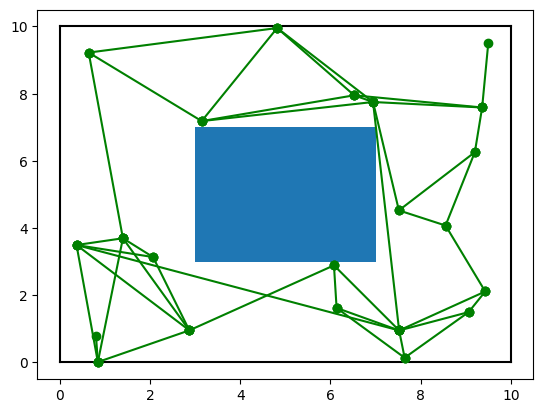

In [8]:
#define Matplotlib figure and axis
fig, ax = plt.subplots()

# Boundary of environment
ax.plot([0, 0],[0, 10], color = 'black')
ax.plot([10, 0],[0, 0], color = 'black')
ax.plot([0, 10],[10, 10], color = 'black')
ax.plot([10, 10],[0, 10], color = 'black')

for i in range(len(xs)):
    ax.plot(xs[i], ys[i], color = 'green', marker = 'o')


#add rectangle to plot
ax.add_patch(Rectangle((3, 3), 4, 4))

#display plot
plt.show()

# Rapidly Exploring Random Trees (RRT)

## Steps:
- Add a valid point found using uniform random distribution
- Check the nearest valid connection
- If the lenght of that connection is less that some value delta (parameter), add that connection
- Else find the point at distance delta from the newly generated point on the connection which was selected
- Add that point to list and make the connection
- Repeat till MAX_POINTS (Maximum number of points) is not reached 

## Pros :
- Low computation
- Simple
- At p -> 1 or t -> infinity, if the environment is simple it will find a path

## Cons :
- May not give efficent path
- Depends on the environment, if there is a narrow valley, it takes a lot of time to get a path.


In [9]:
def PolygonIntersectPolygon(polygon_points : list, other_points : list) -> bool:
    """Check if 2 polygons (polygon, line, point) intersect each other

    Args:
        polygon_points (list): Vertices of polygon (obstacle). Here simply it is considering it to be a rectangle
        other_points (list): Vertices of a line or a point

    Returns:
        bool: Returns whether a line and a polygon intersects or in case of a point, returns whether point is inside the polygon or not
    """
    p1, p2, p3, p4 = map(Point, polygon_points)
    if len(other_points) > 1 : p5, p6 = map(Point, other_points) # If it is a line
    else : p5, p6 = Point(other_points[0]), None # Else it is a point
    poly1 = Polygon(p1, p2, p3, p4)
    poly2 = Polygon(p5, p6) if len(other_points) > 1 else Polygon(p5)
    isIntersection = poly1.intersection(poly2) if len(other_points) > 1 else poly1.encloses(poly2) # Check intersection or point inside
    if len(other_points) > 1 : 
        return False if len(isIntersection) == 0 else True # Returns False if point not inside polygon, else true
    else : return isIntersection # Returns true if line intersects polygon, else False

def _getDistance(point1 : list or tuple, point2 : list or tuple) -> float:
    """Returns Euclidean Distance between 2 points

    Args:
        point1 (listortuple): Point 1 (x, y)
        point2 (listortuple): Point 2 (x, y)

    Returns:
        float: Distance between Point 1 and Point 2
    """
    return np.sqrt( (point1[0] - point2[0]) ** 2 + (point1[1] - point2[1]) ** 2 )


In [10]:
MAX_POINTS = 200
skipped = False
connections = np.zeros((MAX_POINTS + 1, MAX_POINTS + 1), dtype = 'int64')
obstacle_edge_points = [(3, 3), (3, 7), (7, 7), (7, 3)]
points = []

# Add a random starting point
while len(points) == 0:
    x, y = np.random.rand() * 10, np.random.rand() * 10
    if PolygonIntersectPolygon(obstacle_edge_points, [(x, y)]) : continue
    else : points.append((x, y))

In [11]:
delta_t = 0.5 # The delta mentioned in "Steps"
while len(points) < MAX_POINTS :
    x, y = np.random.rand() * 10, np.random.rand() * 10
    distances = []
    for point in points:
        distances.append(_getDistance(point, (x, y)))
    selected_point = np.argmin(distances) # Find the selected connection point
    if distances[selected_point] > delta_t : 
        # If the connection length is greater than delta, select a small section
        t = delta_t / distances[selected_point]
        x, y = (1 - t) * points[selected_point][0] + t * x, (1 - t) * points[selected_point][1] + t * y
    if PolygonIntersectPolygon(obstacle_edge_points, [(x, y)]) or (x, y) in points:
        # If that point is inside obstacle or if the point is already in "points" list, drop it
        continue
    if PolygonIntersectPolygon(obstacle_edge_points, [points[selected_point], (x, y)]):
        # If the connection line is intersecting obstacle, drop it
        continue
    
    # Add Connection between those two points
    connections[selected_point, len(points)], connections[len(points), selected_point] = 1, 1
    
    # Add point to "points" list
    points.append((x, y))

In [12]:
GOAL = (9.5, 9.5)
distances = []
for point in points:
    # Find connection for GOAL
    if PolygonIntersectPolygon(obstacle_edge_points, [GOAL, point]) : distances.append(999)
    else : distances.append(_getDistance(GOAL, point))
selected_point = np.argmin(distances)
connections[-1, selected_point], connections[selected_point, -1] = 1, 1

# Add GOAL to "points" list after adding connection for GOAL
points.append(GOAL)

In [13]:
done_points = []
lines_to_draw = []
for i in range(len(points)):
    for j in range(len(points)):
        if connections[i, j] == 1 and (points[j], points[i]) not in done_points:
            lines_to_draw.append((points[i], points[j]))
            done_points.append((points[i], points[j]))

In [14]:
xs = []
ys = []
for line in lines_to_draw:
    xs.append([line[0][0], line[1][0]])
    ys.append([line[0][1], line[1][1]])

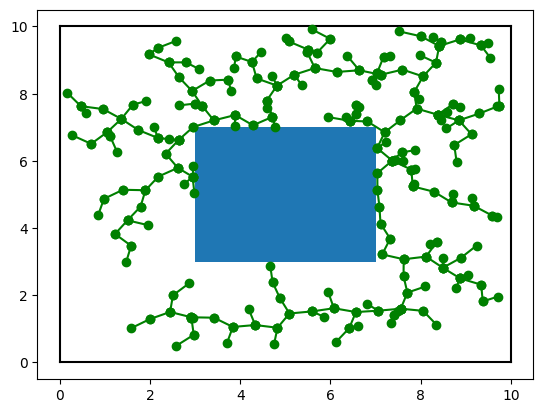

In [15]:
#define Matplotlib figure and axis
fig, ax = plt.subplots()

# Boundary of environment
ax.plot([0, 0],[0, 10], color = 'black')
ax.plot([10, 0],[0, 0], color = 'black')
ax.plot([0, 10],[10, 10], color = 'black')
ax.plot([10, 10],[0, 10], color = 'black')

for i in range(len(xs)):
    ax.plot(xs[i], ys[i], color = 'green', marker = 'o')


#add rectangle to plot
ax.add_patch(Rectangle((3, 3), 4, 4))

#display plot
plt.show()

# Bi-Directional RRT

## Steps:
- At start you have GOAL and START point.
- You find a valid point using uniform random distribution
- Do the same thing we were doing in RRT for both side i.e., from point to nearest neighbour towards GOAL and point to nearest neighbour towards START
- Do this till we dont get a path from START to GOAL

<i><b>Note: No Coding was done for this</b></i>

# RRT*

## Steps:
- Same concept as RRT with a small change
- After forming a valid connection with the newly generated point, you find all points in its neighbourhood in a radius (r here)
- Then you check if you make a connection between the newly made point and a point in its neighbourhood will the distance be less to reach that point in the neighbourhood
- If so, remove the back connection of that point in the neighbourhood
- Add a connection between newly generated point and the point in neighbourhood
- Update cost for all the nodes which are connected to that point in neighbourhood moving forward.

Its advantage is that it will always give the shortest path to the GOAL

In [16]:
def PolygonIntersectPolygon(polygon_points : list, other_points : list) -> bool:
    """Check if 2 polygons (polygon, line, point) intersect each other

    Args:
        polygon_points (list): Vertices of polygon (obstacle). Here simply it is considering it to be a rectangle
        other_points (list): Vertices of a line or a point

    Returns:
        bool: Returns whether a line and a polygon intersects or in case of a point, returns whether point is inside the polygon or not
    """
    p1, p2, p3, p4 = map(Point, polygon_points)
    if len(other_points) > 1 : p5, p6 = map(Point, other_points) # If it is a line
    else : p5, p6 = Point(other_points[0]), None # Else it is a point
    poly1 = Polygon(p1, p2, p3, p4)
    poly2 = Polygon(p5, p6) if len(other_points) > 1 else Polygon(p5)
    isIntersection = poly1.intersection(poly2) if len(other_points) > 1 else poly1.encloses(poly2) # Check intersection or point inside
    if len(other_points) > 1 : 
        return False if len(isIntersection) == 0 else True # Returns False if point not inside polygon, else true
    else : return isIntersection # Returns true if line intersects polygon, else False

def _getDistance(point1 : list or tuple, point2 : list or tuple) -> float:
    """Returns Euclidean Distance between 2 points

    Args:
        point1 (listortuple): Point 1 (x, y)
        point2 (listortuple): Point 2 (x, y)

    Returns:
        float: Distance between Point 1 and Point 2
    """
    return np.sqrt( (point1[0] - point2[0]) ** 2 + (point1[1] - point2[1]) ** 2 )

def _updateCost(cost, points : list, connections, selected_neighbour : int, reached_change_end : bool = False):
    """Updates Cost matrix for all nodes after the selected neighbour

    Args:
        cost (np.array): Cost array (Distance)
        points (list): Points list
        connections (np.array): Connections Array
        selected_neighbour (int): Selected Neighbour index
        reached_change_end (bool, optional): Whether we have reached the end of the connections. Defaults to False.

    Returns:
        no.array: Updated Cost array
    """
    temp = cost.copy()
    if not reached_change_end:
        change_points = [point for point in range(len(connections[selected_neighbour])) if connections[selected_neighbour][point] == 1]
        if len(points) in change_points : change_points.remove(len(points)) # If the newly generated point is in this list, remove it
        if change_points == [] : reached_change_end = True # If there is nothing to change, we are on this subsection
        for change_point in change_points:
            # For each point in the points whose cost has to be changed, compute that cost and set it
            temp[0, change_point] = temp[0, selected_neighbour] + _getDistance(points[selected_neighbour], points[change_point])
        for change_point in change_points:
            # For each point in which whose cost has been changed, find all its children to do the same to them
            temp = _updateCost(temp, points, connections, change_point, reached_change_end)
    
    # Return updated cost matrix
    return temp

In [17]:
MAX_POINTS = 200
skipped = False
connections = np.zeros((MAX_POINTS + 1, MAX_POINTS + 1), dtype = 'int64')
cost = np.zeros((1, MAX_POINTS + 1))
obstacle_edge_points = [(3, 3), (3, 7), (7, 7), (7, 3)]
points = []
while len(points) == 0:
    x, y = np.random.rand() * 10, np.random.rand() * 10
    if PolygonIntersectPolygon(obstacle_edge_points, [(x, y)]) : continue
    else : points.append((x, y))

In [18]:
delta_t = 0.5
r = 0.5 # The radius in which neighbours are considered 
while len(points) < MAX_POINTS :
    x, y = np.random.rand() * 10, np.random.rand() * 10
    distances = []
    for point in points:
        distances.append(_getDistance(point, (x, y)))
    selected_point = np.argmin(distances)
    if distances[selected_point] > delta_t : 
        t = delta_t / distances[selected_point]
        x, y = (1 - t) * points[selected_point][0] + t * x, (1 - t) * points[selected_point][1] + t * y
        distances = []
        for point in points:
            distances.append(_getDistance(point, (x, y)))
    if PolygonIntersectPolygon(obstacle_edge_points, [(x, y)]) or (x, y) in points:
        continue
    if PolygonIntersectPolygon(obstacle_edge_points, [points[selected_point], (x, y)]):
        continue

    # Here back connection is denoted by -1 and forward connection by 1
    connections[selected_point, len(points)], connections[len(points), selected_point] = 1, -1
    cost[0, len(points)] = cost[0, selected_point] +  distances[selected_point]
    
    points.append((x, y))
    
    # Till here same as RRT
    neighbours = []
    
    if len(points) > 3 :
        # If there are more than 3 points than only we will have a case where the situtation required will happen
        for i in range(len(distances)):
            if distances[i] < r : 
                # If distance is less than r, add it to list
                neighbours.append(i)
        cost_neighbour = [distances[neighbour] for neighbour in neighbours] # Cost to each neighbour from that newly generated point
        selected_neighbour = None
        minimum_neighbour_distance = 9999
        for j in range(len(neighbours)):
            if cost[0, neighbours[j]] >= cost[0, len(points) - 1] + cost_neighbour[j] and cost[0, len(points) - 1] + cost_neighbour[j] < minimum_neighbour_distance:
                # If there is a neighbour who has minimum distance and adding a connection from new point to that neighbour has a positive effect on cost matrix, put its ID as selected neighbour
                minimum_neighbour_distance = cost[0, len(points) - 1] + cost_neighbour[j]
                selected_neighbour = neighbours[j]
        if selected_neighbour is not None:
            # If there exist a neighbour whose connection is changed, print it to let user know
            print(f"Updating Neighbours in computation of point {len(points) - 1}")
            
            # Update connection matrix for such a neighbour
            connections[np.argmin(connections[selected_neighbour]), selected_neighbour], connections[selected_neighbour, np.argmin(connections[selected_neighbour])] = 0, 0
            connections[selected_neighbour, len(points) - 1], connections[len(points) - 1, selected_neighbour] = 1, -1
            cost[0, selected_neighbour] = minimum_neighbour_distance
            
            # Update Cost matrix
            cost = _updateCost(cost, points, connections, selected_neighbour, False) 
    if len(points) % 10 == 0 : print(f"Current Number of Points : {len(points)}")

Current Number of Points : 10
Current Number of Points : 20
Current Number of Points : 30
Current Number of Points : 40
Updating Neighbours in computation of point 47
Current Number of Points : 50
Current Number of Points : 60
Current Number of Points : 70
Current Number of Points : 80
Current Number of Points : 90
Current Number of Points : 100
Updating Neighbours in computation of point 103
Current Number of Points : 110
Current Number of Points : 120
Current Number of Points : 130
Current Number of Points : 140
Current Number of Points : 150
Updating Neighbours in computation of point 153
Current Number of Points : 160
Updating Neighbours in computation of point 164
Current Number of Points : 170
Current Number of Points : 180
Updating Neighbours in computation of point 180
Updating Neighbours in computation of point 181
Updating Neighbours in computation of point 185
Current Number of Points : 190
Current Number of Points : 200


In [19]:
GOAL = (9.5, 9.5)
distances = []

# Adding connection to GOAL
for point in points:
    if PolygonIntersectPolygon(obstacle_edge_points, [GOAL, point]) : distances.append(999)
    else : distances.append(_getDistance(GOAL, point))
selected_point = np.argmin(distances)
connections[-1, selected_point], connections[selected_point, -1] = -1, 1
cost[0, -1] = cost[0, selected_point] + _getDistance(points[selected_point], GOAL)
points.append(GOAL)


In [20]:
done_points = []
lines_to_draw = []
for i in range(len(points)):
    for j in range(len(points)):
        if connections[i, j] == 1 and (points[j], points[i]) not in done_points:
            lines_to_draw.append((points[i], points[j]))
            done_points.append((points[i], points[j]))

In [21]:
xs = []
ys = []
for line in lines_to_draw:
    xs.append([line[0][0], line[1][0]])
    ys.append([line[0][1], line[1][1]])

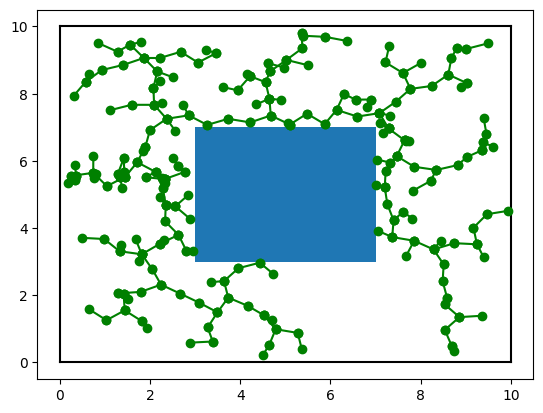

In [22]:
#define Matplotlib figure and axis
fig, ax = plt.subplots()

# Boundary of environment
ax.plot([0, 0],[0, 10], color = 'black')
ax.plot([10, 0],[0, 0], color = 'black')
ax.plot([0, 10],[10, 10], color = 'black')
ax.plot([10, 10],[0, 10], color = 'black')

for i in range(len(xs)):
    ax.plot(xs[i], ys[i], color = 'green', marker = 'o')


#add rectangle to plot
ax.add_patch(Rectangle((3, 3), 4, 4))

#display plot
plt.show()

# Carrot Chasing Algorithm (Path Making)

# Steps:
- We have path made by two points (w0 and w1 here)
- Our Robot's position (p here) is not on this line and we need the robot to go to that line. The Robot also has a heading angle
- We first find a foot of  the perpendicular from Robot's position to the line.
- We move that point a small distance delta along the line, otherwise the robot will make a sinosodial pattern around the line.
- We are aiming for the angle made by the translated foot of the perpendicular and robot position.
- So here $u = k * (\psi_{desired} - \psi)$ where term multiplied with k is the error.
- We need to minimize this value
- If this u is significant we change our psi using $\psi = \psi + u * dt$
- Our robot is always moving forward with speed $v$
- So x-co-ordinate and y-co-ordinate of robot changes by equation $x = x + v * cos(\psi)$ and $y = y + v * cos(\psi)$
- We do this will we dont reach point w1 

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from sympy import Point, Polygon

In [24]:
def _getDistance(point1 : list or tuple, point2 : list or tuple) -> float:
    """Returns Euclidean Distance between 2 points

    Args:
        point1 (listortuple): Point 1 (x, y)
        point2 (listortuple): Point 2 (x, y)

    Returns:
        float: Distance between Point 1 and Point 2
    """
    return np.sqrt( (point1[0] - point2[0]) ** 2 + (point1[1] - point2[1]) ** 2 )

def findFoot(a : float, b : float, c : float, x1 : float, y1 : float) -> tuple:
    """Reutrns point of Foot of the perpendicular to the line ax + by + c = 0 from point (x1, y1)

    Args:
        a (float): Coefficent of x in line equation
        b (float): Coefficent of y in line equation
        c (float): Line intercept
        x1 (float): X-Co-oridinate of the point from which perpendicular is drawn
        y1 (float): Y-Co-oridinate of the point from which perpendicular is drawn

    Returns:
        tuple: The co-ordinate of the foot of the perpendicular
    """
    temp = (-1 * (a * x1 + b * y1 + c) / (a * a + b * b))
    x = temp * a + x1
    y = temp * b + y1
    return (x, y)

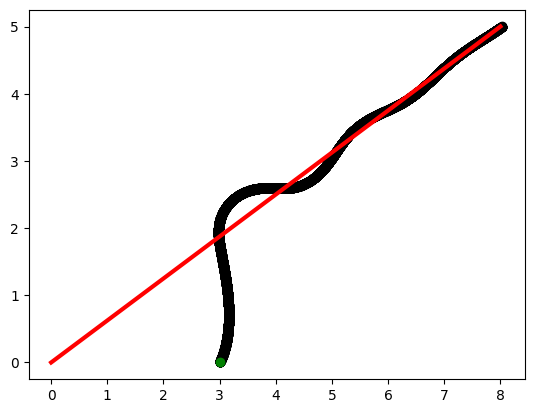

In [25]:
w0 = [0, 0]
w1 = [8, 5]
p = [3, 0]
start = [p[0], p[1]] # Used in plottiog, not in computation
psi = 1.05 # Heading angle of Robot
eps = 0.01 # Minimum distance from w1
delta = 0.1 # Delta
k = 0.1 # Proportionality constant k
xs = [] # To store x-co-ordinates of robot
ys = [] # To store y-co-ordinates of robot
v = 0.1 # Velocity maginiute of robot
u_max = 1.57 # u_max allowed
dt = 0.01 # dt
theta = np.arctan2(w1[1] - w0[1], w1[0] - w0[0]) # Heading angle of line
m, c = (w1[1] - w0[1])/(w1[0] - w0[0]), (w0[0]*w1[1] - w1[0]*w0[1])/(w0[0]-w1[0]) # Slope of line and y-intercept of line. Used in finding foot of perpendicular
while _getDistance(p, w1) > eps : 
    d = findFoot(m, -1, c, p[0], p[1])
    x_vtp, y_vtp = d[0] + delta * np.cos(theta), d[1] + delta * np.sin(theta) # Find the translated foot of perpendicular
    psi_desired = np.arctan2(y_vtp - p[1], x_vtp - p[0]) # Desried heading angle
    u = k * (psi_desired - psi) # u calculation
    psi = psi + u * dt if (-u_max < u) and (u < u_max) else psi # If u is singnificant change psi, else dont change it
    
    # Move Robot
    p[0] = p[0] + v * np.cos(psi) * dt 
    p[1] = p[1] + v * np.sin(psi) * dt 
    
    # Add new Robot poistion to the list
    xs.append(p[0]) 
    ys.append(p[1])

    # If you move in front of w1, stop
    if p[0] > w1[0] and p[1] > w1[1] : break


# Plot all the things
fig, ax = plt.subplots()
for i in range(len(xs)):
    x, y = xs[i], ys[i]
    ax.plot(x ,y, color = "black", marker = 'o') # X, Y co-ordinate of robot
ax.plot(start[0], start[1], color = 'green', marker = 'o') # Starting position of robot
ax.plot([w0[0], w1[0]], [w0[1], w1[1]], color = 'red', linewidth = 3) # Path line
plt.show()

# Proportional Integral Controller

## Steps:
- It has same concept as the Carrot Chasing algorithm, but has update in the equation of $u$.
- The new $u$ is computed as 
$$
u = k_{d} * (\psi_{desired} - \psi) + k_{i} * \int (\psi_{desired} - \psi) * dt
$$
- The integral can explode if we take a lot of time so to counter that we reset after some time

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from sympy import Point, Polygon

In [27]:
def _getDistance(point1 : list or tuple, point2 : list or tuple) -> float:
    """Returns Euclidean Distance between 2 points

    Args:
        point1 (listortuple): Point 1 (x, y)
        point2 (listortuple): Point 2 (x, y)

    Returns:
        float: Distance between Point 1 and Point 2
    """
    return np.sqrt( (point1[0] - point2[0]) ** 2 + (point1[1] - point2[1]) ** 2 )

def findFoot(a : float, b : float, c : float, x1 : float, y1 : float) -> tuple:
    """Reutrns point of Foot of the perpendicular to the line ax + by + c = 0 from point (x1, y1)

    Args:
        a (float): Coefficent of x in line equation
        b (float): Coefficent of y in line equation
        c (float): Line intercept
        x1 (float): X-Co-oridinate of the point from which perpendicular is drawn
        y1 (float): Y-Co-oridinate of the point from which perpendicular is drawn

    Returns:
        tuple: The co-ordinate of the foot of the perpendicular
    """
    temp = (-1 * (a * x1 + b * y1 + c) / (a * a + b * b))
    x = temp * a + x1
    y = temp * b + y1
    return (x, y)

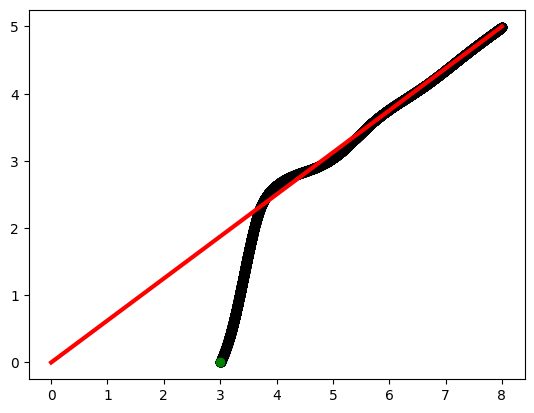

In [28]:
w0 = [0, 0]
w1 = [8, 5]
p = [3, 0]
start = [p[0], p[1]]
psi = 1.05
eps = 0.01
delta = 0.1
kd = 0.1 # k_d value
ki = 0.1 # k_i value
ei = 0 # Integral value
xs = []
ys = []
v = 0.1
dt = 0.01
u_max = 3.14
max_integration = 150 # Maximum time till which integration allowed
theta = np.arctan2(w1[1] - w0[1], w1[0] - w0[0])
m, c = (w1[1] - w0[1])/(w1[0] - w0[0]), (w0[0]*w1[1] - w1[0]*w0[1])/(w0[0]-w1[0])
counter = 1
while _getDistance(p, w1) > eps : 
    d = findFoot(m, -1, c, p[0], p[1])
    x_vtp, y_vtp = d[0] + delta * np.cos(theta), d[1] + delta * np.sin(theta)
    psi_desired = np.arctan2(y_vtp - p[1], x_vtp - p[0])
    if max_integration == 0 : 
        # If reached maximum time, reset "ei" and "max_integration"
        ei = 0
        max_integration = 150
    else : ei += -(psi ** 2) * dt/2 # Else add new recatangle value to integral
    u = kd * (psi_desired - psi) + ki * ei
    psi = psi + u * dt if (-u_max < u) and (u < u_max) else psi
    p[0] = p[0] + v * np.cos(psi) * dt
    p[1] = p[1] + v * np.sin(psi) * dt
    xs.append(p[0])
    ys.append(p[1])
    if p[0] > w1[0] and p[1] > w1[1] : break
    max_integration -= 1 # Decrement max_integration poisble by 1 in each step

# Plotting
fig, ax = plt.subplots()
for i in range(len(xs)):
    x, y = xs[i], ys[i]
    ax.plot(x ,y, color = "black", marker = 'o')
ax.plot(start[0], start[1], color = 'green', marker = 'o')
ax.plot([w0[0], w1[0]], [w0[1], w1[1]], color = 'red', linewidth = 3)
plt.show()

# Vehicle Tracking

## Steps:
- We have two vehicles in 1-D system.
- They both have some velocities, let velocity of vehicle behind be $v1$ and vehicle in forward be $v2$
- We need them to maintain a constant distance between them $d$
- The distance between them is $D$ at any moment in time
- Here error is $D - d$
- Thus $u = k * (D - d)$
- If the error is positive, we are accelerating else we are decelerating.
- Due to this we will change our velcoity of the vehicle in back by 
$$
v1 = v1 + u * dt
$$
$$
\Rightarrow v1 = v1 + k * (D - d) * dt
$$
- Compute the new position of the vehicle using the above velocity which are 
$$
x1 = x1 + v1 * dt
$$
$$
x2 = x2 + v2 * dt
$$
- Move the vehicle to this location

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from sympy import Point, Polygon

In [3]:
def _getDistance(point1 : list or tuple, point2 : list or tuple) -> float:
    """Returns Euclidean Distance between 2 points

    Args:
        point1 (listortuple): Point 1 (x, y)
        point2 (listortuple): Point 2 (x, y)

    Returns:
        float: Distance between Point 1 and Point 2
    """
    return np.sqrt( (point1[0] - point2[0]) ** 2 + (point1[1] - point2[1]) ** 2 )

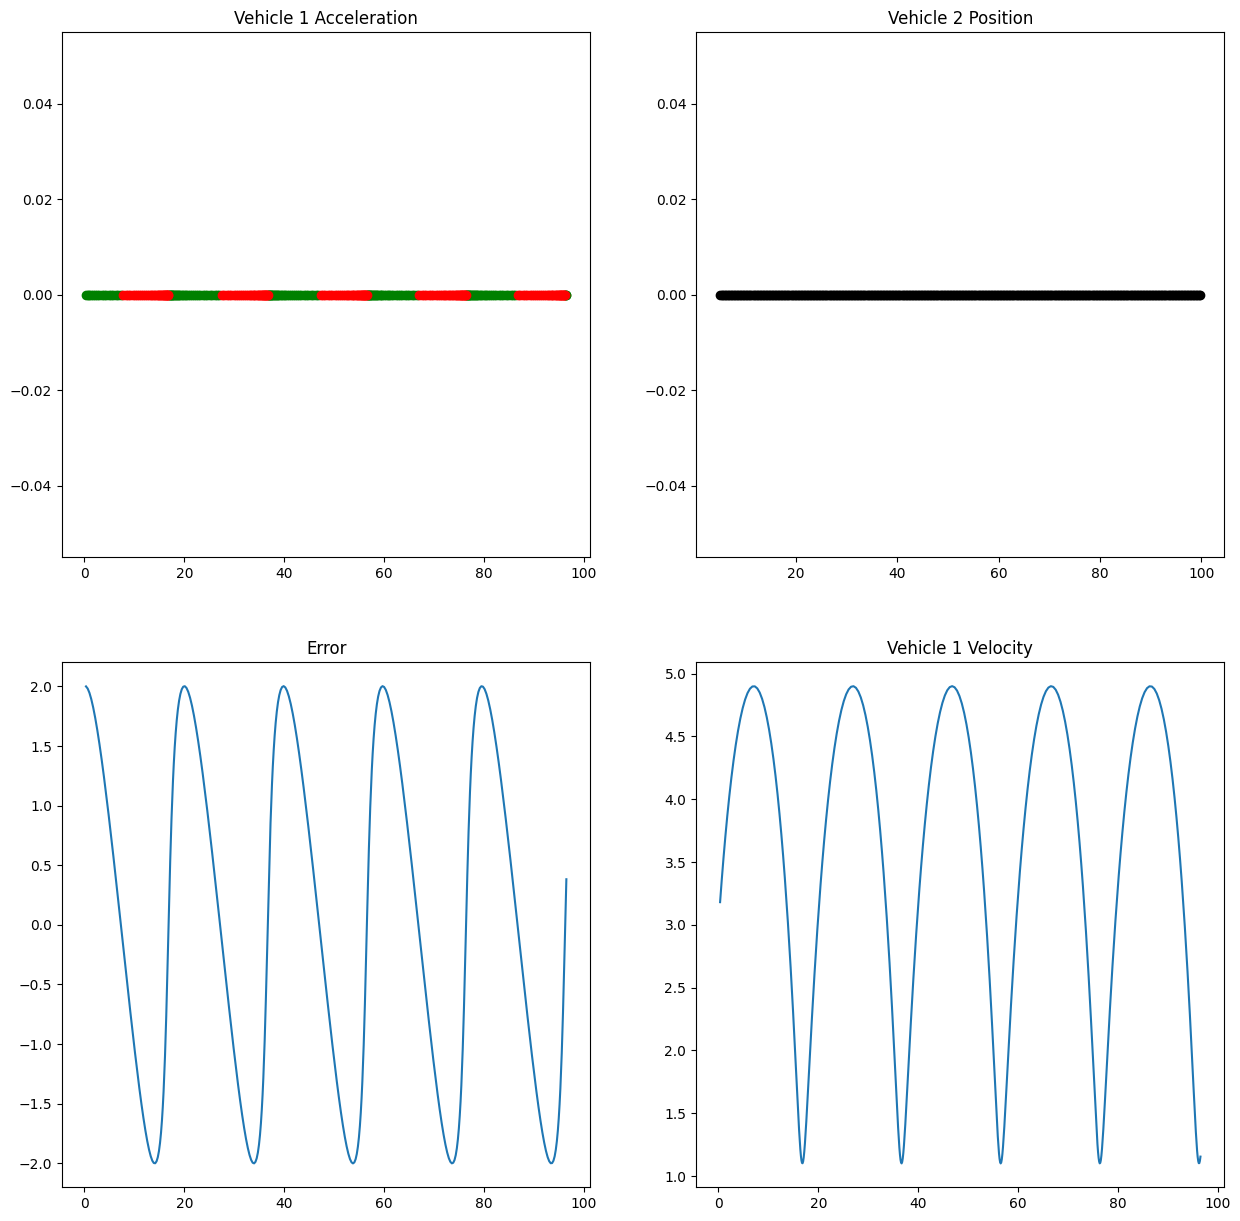

In [27]:
v2 = 3 # Velocity of vehicle in front
v1 = 3 # Velocity of vehicle in back
d = 3 # Minimum distance allowed
p1 = [0, 0] # Starting position of vehicle 1
p2 = [5, 0] # Starting position of vehicle 2
dt = 1e-1 # dt
delta = 1
k = 0.9 # k value 
# kd = 0.1
# ki = 1e-5
# ei = 0
# max_integration = 50

# "a" denotes acceleration and "d" denotes decelration. Used for more intuive plotting
xs1a, ys1a = [], []
xs1d, ys1d = [], []
xs2a, ys2a = [], []
xs2d, ys2d = [], []
xs1 = []

# List ot store error values so we can plot it
error = []
v1s = []
while True:
    D = _getDistance(p1, p2)
    # if max_integration == 0 : 
    #     ei = 0
    #     max_integration = 50
    # else : ei += -(d ** 2) * dt/2
    # u = kd * (D - d) + ki * ei
    u = k * (D - d)
    error.append(D - d)
    v1 += u * dt
    v1s.append(v1)
    p1[0] = p1[0] + v1 * dt
    if u > 0 : 
        # If u is positive we are accelerating, so add those to accelerating list
        xs1a.append(p1[0])
        ys1a.append(0)
        xs2a.append(p2[0])
        ys2a.append(0)
    else:
        # If u is negative we are decelerating, so add those to decelerating list
        xs1d.append(p1[0])    
        ys1d.append(0)
        xs2d.append(p2[0])
        ys2d.append(0)   
    xs1.append(p1[0])
    p2[0] = p2[0] + v2 * dt
    if p2[0] > 100 : break # If vehicle 2 reaches 150 in x-co-ordinate, stop
    max_integration -= 1

# Plot 3 figures
# Figure 1 : Accelration, Deceleration and position of vehicle 1
# Figure 2 : Position of vehicle 2
# Figure 3 : Error grpah
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize = (15, 15))
for i in range(len(xs1a)):
    x1, y1 = xs1a[i], ys1a[i]
    x2, y2 = xs2a[i], ys2a[i]
    ax1.plot(x1 ,y1, color = "green", marker = 'o') # Accelerating vehicle 1
    ax2.plot(x2 ,y2, color = "black", marker = 'o') # vehicle 2
    
for i in range(len(xs1d)):
    x1, y1 = xs1d[i], ys1d[i]
    x2, y2 = xs2d[i], ys2d[i]
    ax1.plot(x1 ,y1, color = "red", marker = 'o') # Decelerating vehicle 1
    ax2.plot(x2 ,y2, color = "black", marker = 'o') # vehicle 2
ax3.plot(xs1, error) # Error
# ax3.plot(range(len(error)), error) # Error
ax4.plot(xs1, v1s) # Velcoity vehicle 1
# ax4.plot(range(len(v1s)), v1s) # Velcoity vehicle 1
ax1.set_title('Vehicle 1 Acceleration')
ax2.set_title('Vehicle 2 Position')
ax3.set_title('Error')
ax4.set_title('Vehicle 1 Velocity')
# ax.plot(start[0], start[1], color = 'green', marker = 'o')
# ax.plot([w0[0], w1[0]], [w0[1], w1[1]], color = 'red', linewidth = 3)
plt.show()

## Particle swarm optimization

Exploration $\rightarrow$ Local best

Exploitation $\rightarrow$ Global best

$$
x^i_{t+1} = x^i_t + v^i_{t+1}
$$

$$
v^i_{t+1} = \omega * v^i_{t} + c_1 * r_1 * (p^i_{t} - x^i_t) + c_2 * r_2 * (G - x^i_t)
$$

$c_j$ : Gain ratio

$r_j$ : randomness ratio

$i$ : Dimension of Waypoints. If we need 4 waypoints then $i$ is 4 (Number of waypoints) * 2 (x, y co-ordinate) = 8

<b>Temporary Algo:</b>
1. Put $n$ particles in $n$ random locations
2. Initalize $\omega$, $c_1$, $c_2$
3. Each particle has value $P^i = [x_1^i, y_1^i, x_2^i, y_2^i, x_3^i, y_3^i ,x_4^i, y_4^i]$
4. Make a fitness function which returns distance to travel using those 4 waypoints - staright line distance from start to goal.
5. If it passes through an obstacle return the fitness to be infinity. Else it returns the value
6. Choose best one from them as local best fitness.
7. The best of those will be the G i.e. global minima.
8. While the best local fitness error is not less than a certain value or there is very little change in the best fitness value for $N$ iterations.
9. Calculate $v_t^i$ for each point in the $P^i$ by making two random numbers $r_1$ and $r_2$
10. Update position of all the waypoints for all particles.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from sympy import Point, Polygon

Custom Functions

In [107]:
def PolygonIntersectPolygon(polygon_points : list, other_points : list) -> bool:
    """Check if 2 polygons (polygon, line, point) intersect each other

    Args:
        polygon_points (list): Vertices of polygon (obstacle). Here simply it is considering it to be a rectangle
        other_points (list): Vertices of a line or a point

    Returns:
        bool: Returns whether a line and a polygon intersects or in case of a point, returns whether point is inside the polygon or not
    """
    p1, p2, p3, p4 = map(Point, polygon_points)
    if len(other_points) > 1 : p5, p6 = map(Point, other_points) # If it is a line
    else : p5, p6 = Point(other_points[0]), None # Else it is a point
    poly1 = Polygon(p1, p2, p3, p4)
    poly2 = Polygon(p5, p6) if len(other_points) > 1 else Polygon(p5)
    isIntersection = poly1.intersection(poly2) if len(other_points) > 1 else poly1.encloses(poly2) # Check intersection or point inside
    if len(other_points) > 1 : 
        return False if len(isIntersection) == 0 else True # Returns False if point not inside polygon, else true
    else : return isIntersection # Returns true if line intersects polygon, else False

def _getDistance(point1 : list or tuple, point2 : list or tuple) -> float:
    """Returns Euclidean Distance between 2 points

    Args:
        point1 (listortuple): Point 1 (x, y)
        point2 (listortuple): Point 2 (x, y)

    Returns:
        float: Distance between Point 1 and Point 2
    """
    return np.sqrt( (point1[0] - point2[0]) ** 2 + (point1[1] - point2[1]) ** 2 )

def _invalidLine(line : list, polygons : list) -> bool:
    for polygon in polygons:
        if PolygonIntersectPolygon(polygon, line):
            return True
    return False


def fitness(P : list, start : tuple, goal : tuple, polygons : list = None, N_WAYPOINTS : int = 4) -> float:
    # if _invalidLine([start, P[0]], polygons) : return float('inf')
    # else : cost = _getDistance(start, P[0])
    cost = _getDistance(start, P[0])
    
    # for i in range(2, 4):
    #     x1, y1, x2, y2 = P[i], P[i+1], P[i+2], P[i+3]
    #     print((x1, y1), (x2, y2))
    #     cost += _getDistance( (x1, y1), (x2, y2) )
    for i in range(N_WAYPOINTS - 1):
        # for polygon in polygons:
            # if _invalidLine([P[i], P[i + 1]], polygons) : return float('inf')
        cost += _getDistance( (P[i]) , (P[i  + 1]) )
    cost += _getDistance(P[-1], goal)
    error = cost - _getDistance(start, goal)
    return error

def _getPolygons(points : list[tuple]):
    polygons = []
    for point in points:
        polygons_points = map(Point, point)
        polygons.append(Polygon(polygons_points))
    return polygons

def _updateVs(Vs : list, Ps : list, local_minimum : list, global_minimum : tuple, c1 : float, c2 : float, w : float, V_max : float = 10.0) -> None:
    for i in range(len(Ps)):
        for j in range(len(Ps[i])):
            x, y = Ps[i][j]
            vx, vy = Vs[i][j]
            local_minimum_x, local_minimum_y = local_minimum[i][0][j]
            global_minimum_x, global_minimum_y = global_minimum[0][j]
            
            r1, r2 = np.random.rand(), np.random.rand()
            vx = w * vx + c1 * r1 * (local_minimum_x - x) + c2 * r2 * (global_minimum_x - x)
            vy = w * vy + c1 * r1 * (local_minimum_y - y) + c2 * r2 * (global_minimum_y - y)
            if vx < 1e-8 and vx > 0: vx = V_max
            if vx > -1e-8 and vx < 0: vx = -V_max
            Vs[i][j] = (vx, vy)

def _updateX(Ps, Vs, dt = 1e-2):
    for i in range(len(Ps)):
        for j in range(len(Ps[i])):
            x, y = Ps[i][j]
            vx, vy = Vs[i][j]
                       
            x = x + vx * dt
            y = y + vy * dt
            Ps[i][j] = (x, y)

In [108]:
Vs[0]

[(-7.0626645493633715, 3.1246621645804264),
 (-12.090133319035305, -21.767261623129293),
 (-1.0188918010967816, 6.560082791052797),
 (11.616867278294768, -17.23260093443365)]

In [113]:
N = 10 # Number of particles
N_WAYPOINT = 4 # Number of waypoints
V_max = 10
goal = (9.5, 9.5)
start = (0.2, 0.2)
threshold = 5
c1, c2, w = 0.1, 0.9, 0.8
# # polygon_points = [()]
# # polygons = _getPolygons()
# Ps = np.zeros((N, N_WAYPOINT * 2))
# for particle in range(Ps.shape[0]):
#     for point in range(Ps.shape[1]):
#         Ps[particle][point] = np.random.rand() * 10
# # Ps = list(np.random.rand(N, 2).reshape(-1) * 10)
# Vs = np.zeros((N, N_WAYPOINT * 2))
# for particle in range(Vs.shape[0]):
#     for point in range(Vs.shape[1]):
#         V = np.random.randn()
#         if V < -V_max : Vs[particle][point] = -V_max
#         elif V > V_max : Vs[particle][point] = V_max
#         else : Vs[particle][point] = V

# Pfs = [fitness(P, start, goal) for P in Ps]
# # local_best = Ps[np.argmin(Pfs)]
# # global_best = local_best
# # while (global_best > threshold):
    
# print(Pfs)


In [114]:
Ps = []
for _ in range(N):
    points = []
    for _ in range(N_WAYPOINT):
        x, y = np.random.rand() * 10, np.random.rand() * 10
        points.append((x, y))
    Ps.append(points)
Vs = []
for _ in range(N):
    velocities = []
    for _ in range(N_WAYPOINT):
        Vx, Vy = np.random.randn(), np.random.randn()
        if Vx < -V_max : Vx = -V_max
        elif Vx > V_max : Vx = V_max
        if Vy < -V_max : Vy = -V_max
        elif Vy > V_max : Vy = V_max
        velocities.append((Vx, Vy))
    Vs.append(velocities)

In [115]:
local_minimum = []
global_minimum = (None, float('inf'))
for i in range(N):
    local_minimum.append((Ps[i], fitness(Ps[i], start, goal)))
    if local_minimum[i][1] < global_minimum[1] : global_minimum = local_minimum[i]

In [116]:
count = 0
# while 50 > count:
while global_minimum[1] > threshold:
    _updateVs(Vs, Ps, local_minimum, global_minimum, c1, c2, w)
    _updateX(Ps, Vs)
    for i in range(N):
        
        fitness_i = fitness(Ps[i], start, goal)
        if local_minimum[i][1] < fitness_i:
            print(local_minimum[i][1], "Updated to : ", fitness_i)
            local_minimum[i] = (Ps[i], fitness_i)
        if local_minimum[i][1] < global_minimum[1] : 
            print("global minimum updated")
            global_minimum = local_minimum[i]
    print(global_minimum[1])
    count += 1

5.205920504551743
5.205920504551743
5.205920504551743
5.205920504551743
5.205920504551743
5.205920504551743
5.205920504551743
5.205920504551743
5.205920504551743
5.205920504551743
5.205920504551743
5.205920504551743
5.205920504551743
5.205920504551743
5.205920504551743
5.205920504551743
5.205920504551743
5.205920504551743
5.205920504551743
5.205920504551743
5.205920504551743
5.205920504551743
5.205920504551743
5.205920504551743
5.205920504551743
5.205920504551743
5.205920504551743
5.205920504551743
5.205920504551743
5.205920504551743
5.205920504551743
5.205920504551743
5.205920504551743
5.205920504551743
5.205920504551743
5.205920504551743
5.205920504551743
5.205920504551743
5.205920504551743
5.205920504551743
5.205920504551743
5.205920504551743
5.205920504551743
5.205920504551743
5.205920504551743
5.205920504551743
5.205920504551743
5.205920504551743
5.205920504551743
5.205920504551743
5.205920504551743
5.205920504551743
5.205920504551743
5.205920504551743
5.205920504551743
5.20592050

KeyboardInterrupt: 

In [117]:
Vs

[[(-1.2967747385743534e-14, -2.0262105290224272e-16),
  (1.3581279711619376e-14, 2.942610604184198e-14),
  (-2.5654762698618387e-14, 2.5654762698618387e-14),
  (2.8285582848997175e-14, 5.657116569799435e-14)],
 [(-1e-323, -1e-323),
  (1e-323, 1e-323),
  (-1e-323, -1e-323),
  (-1e-323, -1e-323)],
 [(1.3982011197722898e-14, -2.1846892496442028e-16),
  (-1.221669600639388e-14, 2.443339201278776e-14),
  (2.5403896502794145e-14, -2.5403896502794145e-14),
  (3.1581769852925454e-14, 5.830480588232391e-14)],
 [(1.656050623801923e-14, -2.587579099690505e-16),
  (-1.2424589059724605e-14, -2.484917811944921e-14),
  (-2.2235966779801436e-14, -2.2235966779801436e-14),
  (2.3948889639059475e-14, 4.789777927811895e-14)],
 [(1.3399558163788838e-14, -2.093680963092006e-16),
  (7.935780834444858e-15, 1.5871561668889717e-14),
  (-2.2571190913659848e-14, -2.2571190913659848e-14),
  (2.733848232788207e-14, 5.467696465576414e-14)],
 [(9.088685256483907e-15, -1.3108680658390252e-16),
  (-1.1142949506077845e-

In [69]:
_updateX(Ps, Vs)

Old :  (4.211475956234523, 2.646588304974473)
New :  (3.9933284827119913, 2.6776027962279643)
Old :  (8.899728862744908, 5.833516400818334)
New :  (8.778407469708322, 5.671793680376314)
Old :  (1.4540082557558032, 0.40808139623149)
New :  (1.5101726292836788, 0.829605117059547)
Old :  (1.9356345043388246, 4.595949206512651)
New :  (2.089723385770094, 4.762264435800184)
Old :  (0.5139570290285245, 1.404470523862933)
New :  (0.5164611330130182, 1.3615262791900995)
Old :  (0.8420193968976963, 2.2441105671900576)
New :  (0.958113741115423, 2.169016151047151)
Old :  (4.780112381287621, 7.803704578776336)
New :  (4.875951396374163, 7.794455444964495)
Old :  (5.951387171481101, 7.301994347166549)
New :  (6.048096389030553, 7.235802131553623)
Old :  (7.889185127744139, 0.6458603055031509)
New :  (7.517559756062916, 0.5797832454952463)
Old :  (9.616323216501566, 1.4524629425343838)
New :  (9.514430561537269, 1.3746199837213187)
Old :  (1.0555592360224209, 6.624930070768419)
New :  (1.2917602601